In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import filters

In [2]:
img = cv2.imread('image1004.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

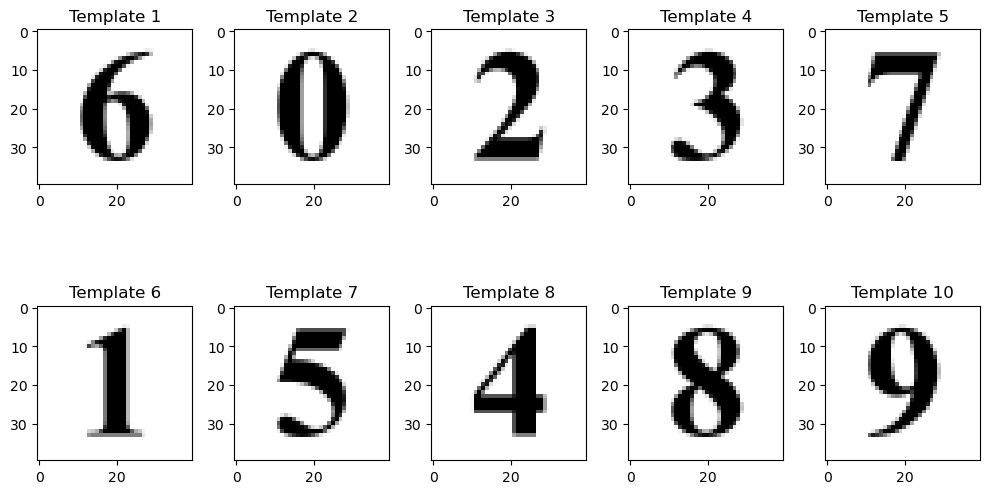

In [3]:
candidate_dir = './Dataset/TNR'
images = []

for i in os.listdir(candidate_dir):
    path = os.path.join(candidate_dir,i)
    candidate = cv2.imread(path)
    images.append(candidate)

fig, axes = plt.subplots(2, 5, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(f'Template {i + 1}')
    #ax.axis('off')

plt.tight_layout()
plt.show()

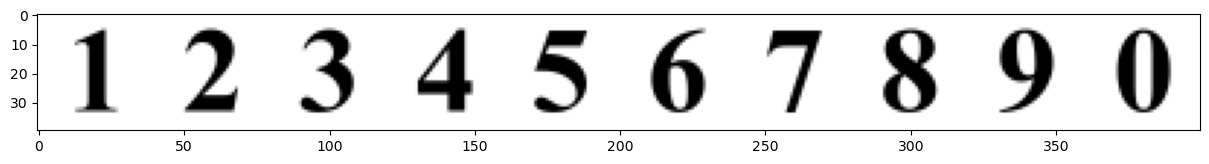

In [4]:
template_dir = './Dataset/templete.png'
template = cv2.imread(template_dir)
plt.figure(figsize=(15, 15))
plt.imshow(template)

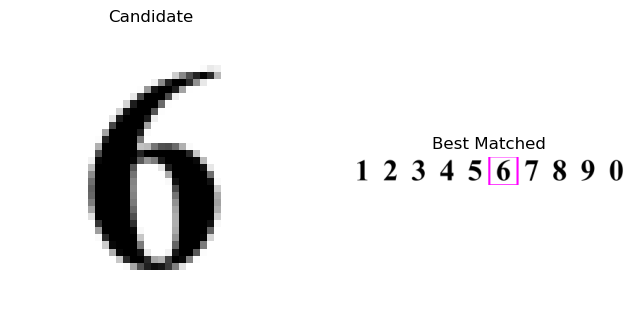

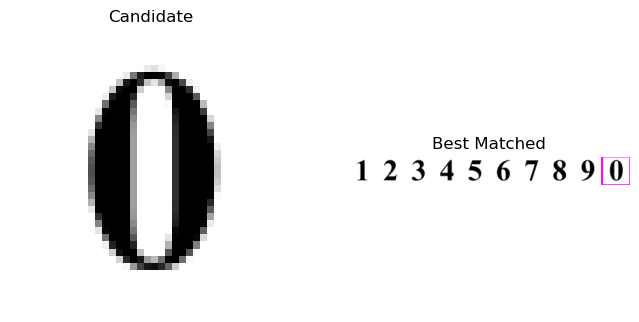

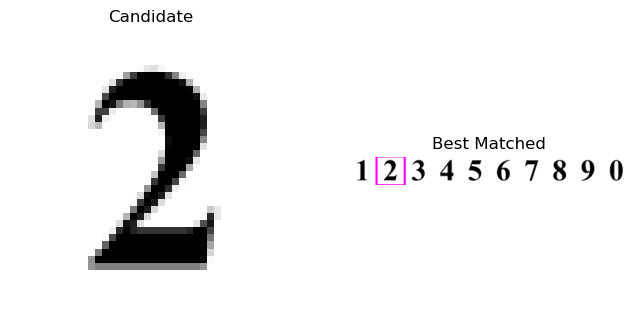

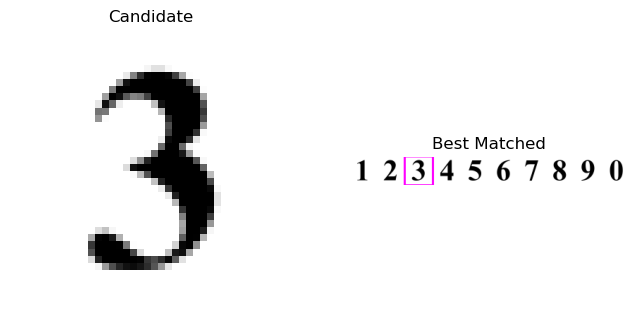

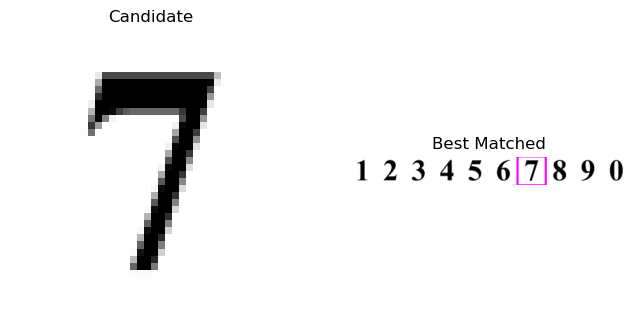

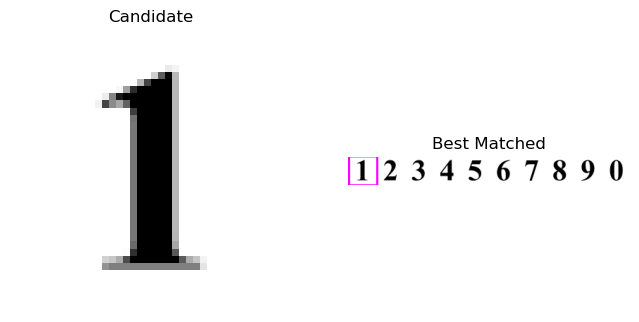

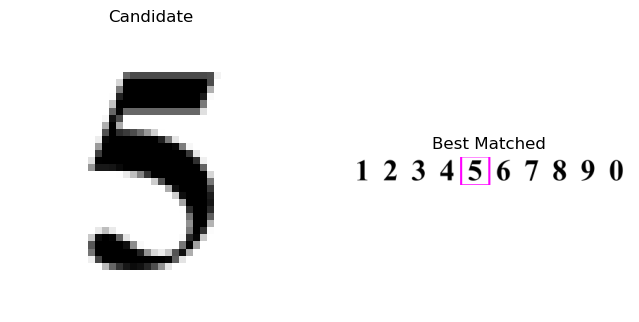

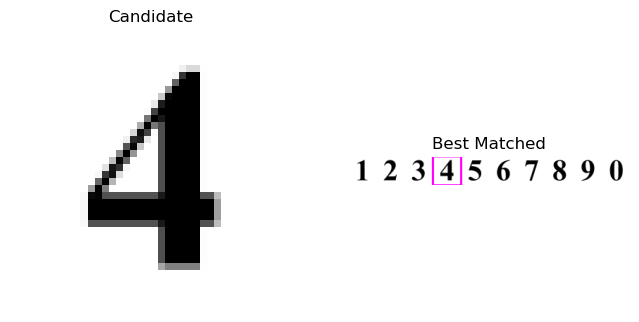

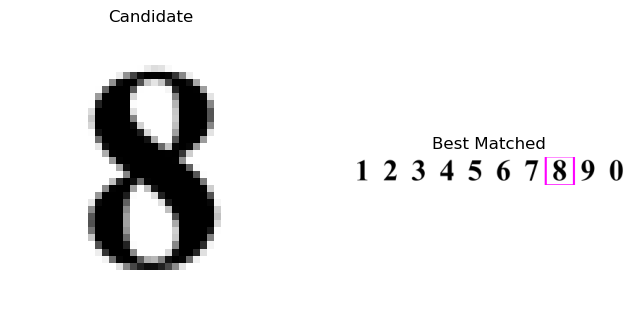

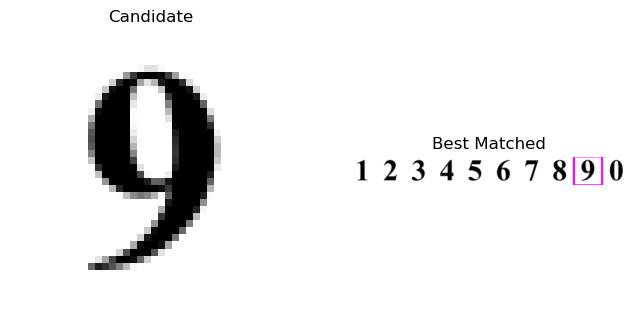

In [5]:
for i in os.listdir(candidate_dir):

    path = os.path.join(candidate_dir,i)
    candidate = cv2.imread(path)

    candidate_gray = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    thres_candidate = filters.threshold_otsu(candidate_gray)
    _,candidate_bin= cv2.threshold(candidate_gray,thres_candidate,255,cv2.THRESH_BINARY)


    template = cv2.imread(template_dir)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    thres_template = filters.threshold_otsu(template_gray)
    _,template_bin = cv2.threshold(template_gray,thres_template,255,cv2.THRESH_BINARY)

    result = cv2.matchTemplate(candidate_bin, template_bin, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)

    h,w = candidate_bin.shape
    top_left = max_loc
    bottom_right = (top_left[0] + h, top_left[1] + w )

    cv2.rectangle(template, top_left, bottom_right,(255,0,255), 2)
    fig, axs = plt.subplots(1, 2, figsize=(8, 8))

    axs[0].imshow(candidate)
    axs[0].axis('off')
    axs[0].set_title('Candidate')

    axs[1].imshow(template)
    axs[1].axis('off')
    axs[1].set_title('Best Matched')
    plt.show()

In [6]:
candidate = cv2.imread('./Dataset/TNR/3.png')
candidate_gray = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
thres_candidate = filters.threshold_otsu(candidate_gray)
_,candidate_bin= cv2.threshold(candidate_gray,thres_candidate,255,cv2.THRESH_BINARY)


template = cv2.imread(template_dir)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
thres_template = filters.threshold_otsu(template_gray)
_,template_bin = cv2.threshold(template_gray,thres_template,255,cv2.THRESH_BINARY)


  # Using NCC
result = cv2.matchTemplate(candidate_bin, template_bin, cv2.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(result)


print(f'Maximum co-efficient {max_val}')

print('Matching value:')
#len(result[0])
for i in range(10):
  ind = i*30
  print(result[0][ind], end=" | ")

Maximum co-efficient 0.9116209745407104
Matching value:
0.3717227 | 0.037453797 | -0.14489798 | -0.04062818 | 0.4462837 | 0.087784246 | -0.16696385 | -0.080538355 | 0.4625643 | 0.20084131 | 

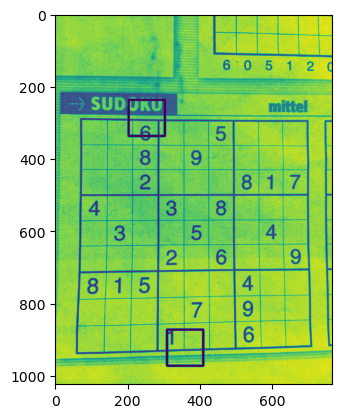

In [9]:
img = cv2.resize(cv2.imread('image1004.jpg', 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.resize(cv2.imread('./Dataset/TNRT/5.png', 0), (0, 0), fx=0.8, fy=0.8)
h, w = [100,100]

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img2 = img.copy()
for method in methods:

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_CCORR]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2, location, bottom_right, 20, 5)

    plt.imshow(img2)

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


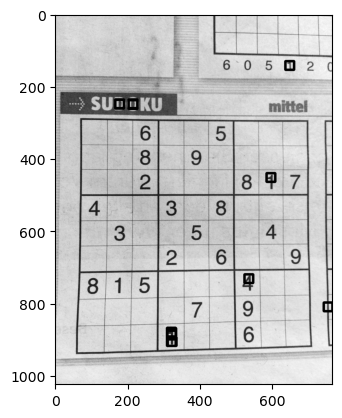

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.resize(cv2.imread('image1004.jpg', 0), (0, 0), fx=0.8, fy=0.8)
img2 = img.copy()

template_dir = './Dataset/TNRT/'
template_names = [str(i) + '.png' for i in range(10)]

print(template_names)

for template_name in template_names:
    template = cv2.resize(cv2.imread(template_dir + template_name, 0), (0, 0), fx=0.8, fy=0.8)
    h, w = template.shape[:2]

    methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

    for method in methods:
        result = cv2.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if method in [cv2.TM_CCORR]:
            location = min_loc
        else:
            location = max_loc

        bottom_right = (location[0] + w, location[1] + h)
        cv2.rectangle(img2, location, bottom_right, 20, 5)

plt.imshow(img2, cmap='gray')
plt.show()
